# Module 4 Random Process in Thermal Systems
(Partially adapted from Landau 2015 and Newman 2012)

In this Module we will simulate thermodynamics of an interacting spin system using numpy's random number functions we practiced with last semester. In the process we will also get our hands on practicing the following:

- Using Numba to speed up python simulations
- Generating random numbers following a desired probability distribution
- Animating image representations of numpy arrays
- Implementing periodic boundary conditions in 2D systems

foo <font color='red'>bar</font> foo


## 1.1  Ising Model in 1D

Ferromagnets contain finite-size *domains* in which the spins of all the atoms point in the same direction. When an external magnetic field is applied to these materials, the different domains align and the materials become magnetized. Yet as the temperature is raised, the total magnetism decreases, and at the Curie temperature the system goes through a *phase transition* beyond which all magnetization vanishes. Our problem in this module is to explain the thermal behavior of ferromagnets.

As a first model we consider $N$ spins fixed in place on the links of a linear chain. Because the spins
are fixed in space, their positions and momenta are not variables. We assume that the particle at site $i$ has spin $s_{i}$, which is either up or down:

$$\tag*{17.1} s_{i} = \pm \frac{1}{2}.$$

Each configuration of the $N$ spin can be labeled by a state 

$$\tag*{17.2}
\alpha_{j}  = \{s_{1}, s_{2}, \ldots ,
s_{N} \} = \left\{\pm\frac{1}{2},
  \pm\frac{1}{2},   \ldots \right\}, \quad
j=1,\ldots, 2^{N}.$$

Because the spin of each particle can assume any one of *two* values,
there are $2^{N}$ different possible states for the $N$ particles in the
system.

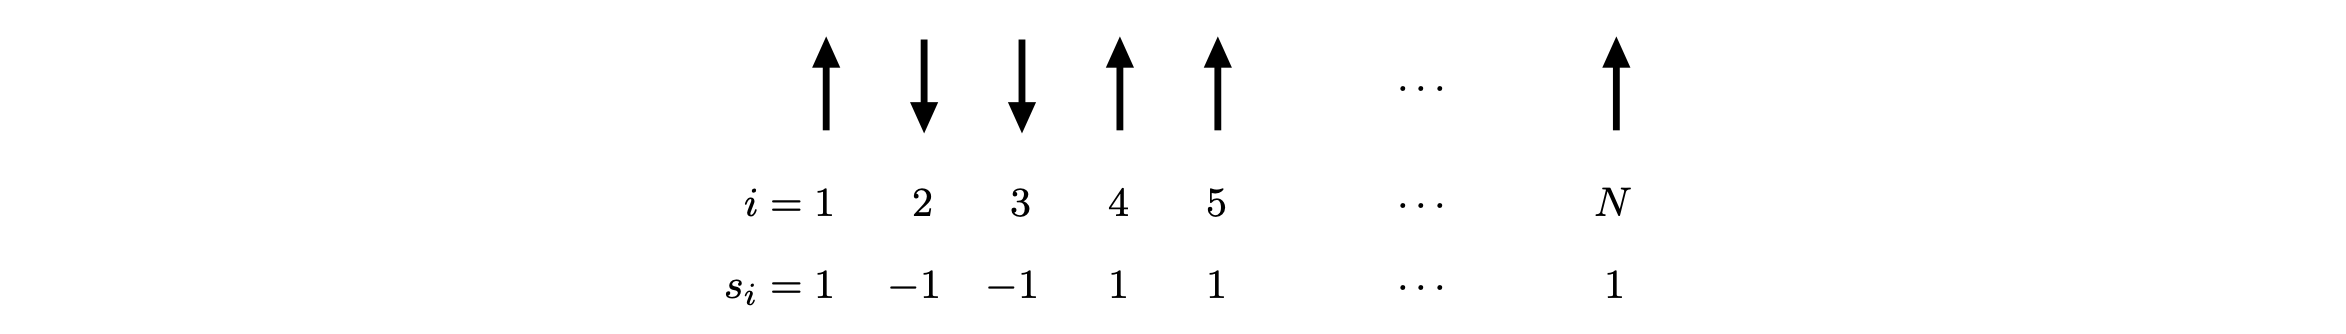
<p style="text-align:center"> (from Schroeder Fig. 8.5) </p>

In the absence of an external field, the energy of the system arises from the coupling of the spins with
each other. We know from quantum mechanics that an electron’s spin and magnetic moment are
proportional to each other, so a magnetic <span>*dipole-dipole*</span>
interaction is equivalent to a <span>*spin-spin*</span> interaction. The 1D Ising model
assumes that each spin interacts with its nearest neighbor through the potential:

$$\tag*{17.3} V_{i} = - J {s}_{i}{s}_{i+1}.$$

Here the constant $J$ is called the *exchange energy* and is a measure
of the strength of the spin-spin interaction.

The total energy of a 1D Ising model is then the sum of the potential $V_i$ over all spins :

$$\tag*{17.4} E_{total} = -J \sum_{i=1}^{N-1} s_{i}s_{i+1}.$$

Even for small numbers of particles, the $2^{N}$ possible spin
configurations gets to be very large ($2^{20} > 10^6$), and it is
expensive for the computer to sample the total energies of all possible configurations. Realistic samples with
${\sim}10^{23}$ particles are beyond imagination. Consequently,
statistical approaches are usually assumed, even for moderate values of
$N$.


One striking feature of the Ising model is that, in the absence of an
external magnetic field, the lowest energy state has all spins aligned at zero temperature. This is because the system with zero external magnetic field is unstable at low temperatures, and has to make a choice between orienting every spin up or every spin down: these two configurations are both the $T=0$ ground state. This is a simplistic representation of natural magnetic materials, where, at low temperatures, each magnetic domain has to make a choice in orienting all the spins within it (but different domains can point in different
directions).

The equilibrium alignment of the spins depends critically on the sign of
the exchange energy $J$. If $J>0$, the lowest energy state will tend to
have neighboring spins aligned. If the temperature is low enough, the
ground state will be a *ferromagnet* with all the spins aligned. Yet if
$J<0$, the lowest energy state will tend to have neighbors with opposite
spins. If the temperature is low enough, the ground state will be a
*antiferromagnet* with alternating spins.

<!-- The simple 1D Ising model has its limitations. Although the model is
accurate in describing a system in thermal equilibrium, it is not
accurate in describing the *approach* to thermal equilibrium. Second, we
have postulated that only one spin is flipped at a time, while real
magnetic materials tend to flip many spins at a time. Other limitations
are straightforward to improve, for example, the addition of
longer-range interactions than just nearest neighbors, the motion of the
spin, higher-multiplicity spin states, and extension to two and three
dimensions. -->

Another fascinating aspect of magnetic materials is the existence of a
critical temperature, the *Curie temperature*, above which the total
magnetization essentially vanishes. Below the Curie temperature the
system has long-range order; above the Curie
temperature there is only short-range order extending over atomic
dimensions. 

## 1.2  Analytical Solution of 1D Ising Model

Statistical mechanics starts with the elementary interactions among a
system’s particles and constructs the macroscopic thermodynamic
properties such as specific heats. The essential assumption is that all
configurations of the system consistent with the constraints are
possible. In this Module, the temperature, volume, and number of particles remain
fixed, and so we have what is called a *canonical ensemble*.

When we say that a system is at temperature $T$, we mean that the
system is in thermodynamic equilibrium with an average kinetic
energy proportional to $T$, while the system's total energy fluctuates as it
exchanges energy with its environment. Indeed, one of the most illuminating aspects of the simulation to
follow its visualization of the continual and random interchange of
energy that occurs at equilibrium.

The energy $E_{\alpha_j}$ of state $\alpha_j$ at temperature $T$
is not constant but is distributed with probabilities $P(\alpha_j)$
given by the Boltzmann distribution:

$$\tag*{17.5}
 {\cal P}(E_{\alpha_j},T)= \frac{e^{-E_{\alpha_j}/k_BT}}
{Z(T)},\quad Z(T)=
\sum_{\alpha_j}e^{-E_{\alpha_j}/k_BT}.$$

Here $k$ is Boltzmann’s constant, $T$ the temperature, and $Z(T)$ the
partition function, a weighted sum over the individual *states* or
*configurations* of the system. 

For very large numbers of spins, the thermodynamic properties of the 1D
Ising model can be solved analytically (see e.g. Schroeder pg.104 and pg.342).

The average energy at temperature $T$ is
$$\begin{align}
\tag*{17.6}
& \langle E \rangle =  - N \tanh \frac{J}{k_BT} \end{align}$$
and the Curie temperature is 

$$\begin{align}
k T_c & = 0
\end{align}$$

## 2.1 Ising model in 2D

Although the 1D Ising model predicts realistic temperature
dependences for the thermodynamic quantities, the model is too simple to
support a phase transition. However, the 2D Ising model does
support a finite Curie temperature phase transition. The Curie temperature of the 2D Ising model is given by
$$\begin{align}
k T_c &\simeq 2.269185 J,\tag*{17.11}\end{align}$$

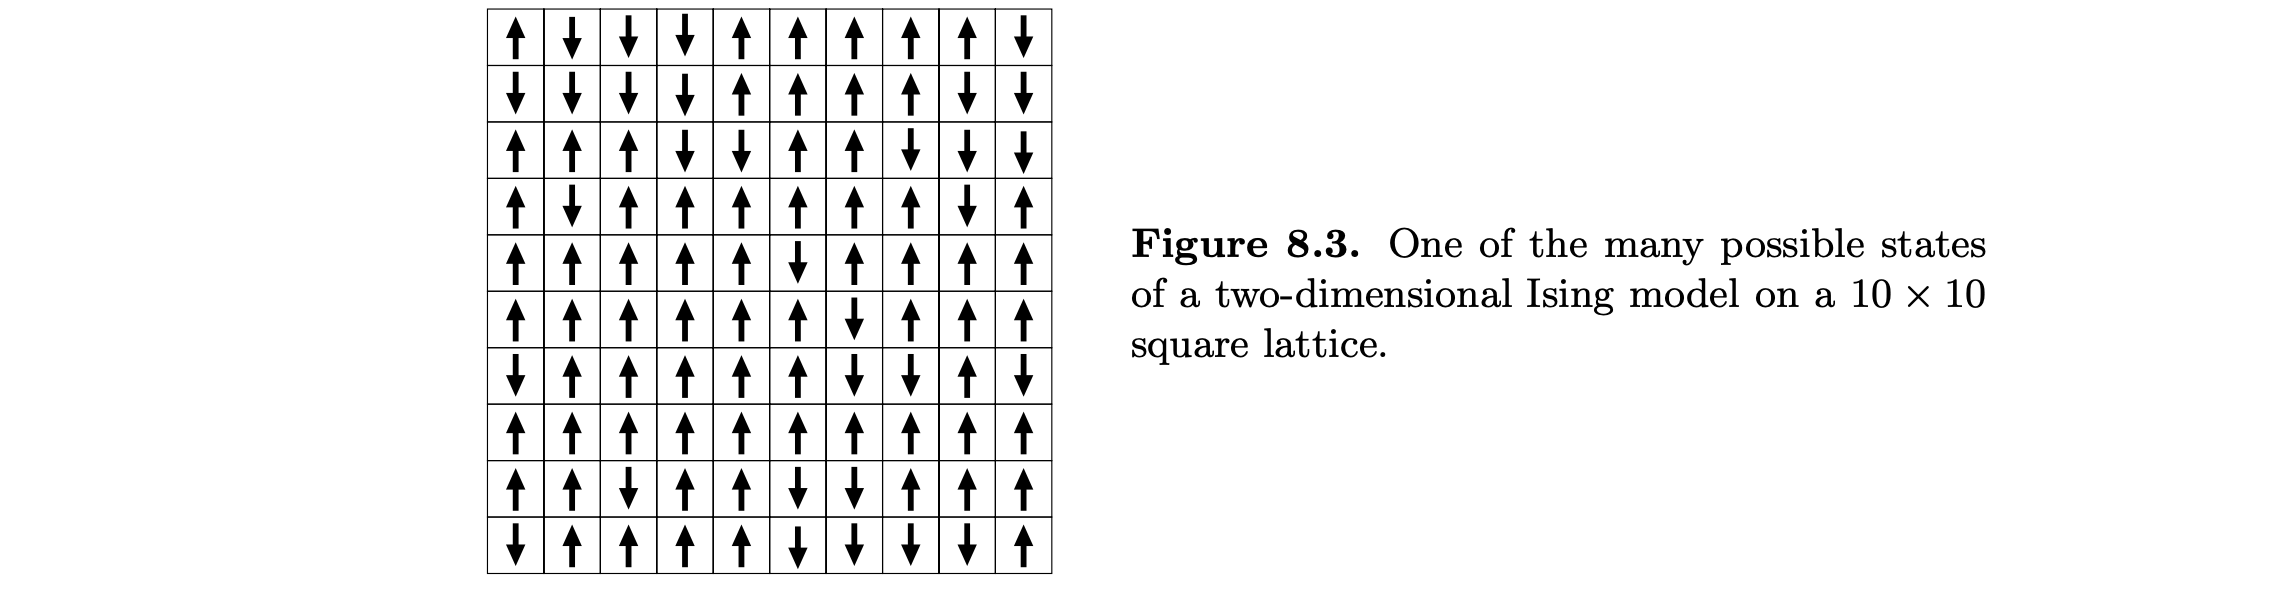
<p style="text-align:center"> (from Schroeder Fig. 8.3) </p>

Next we will introduce the Metropolis Algorithm to implement a 2D Ising model numerically. 

## 2.2  Metropolis Algorithm 


One algorithm that efficiently simulates thermal equilibrium is the
*Metropolis algorithm*, now considered a cornerstone of computational physics
because it produces a large number of spin configurations one after another (a *Markov chain*)
that accurately simulates realisitic fluctuations at thermal
equilibrium. The algorithm randomly changes the individual spins such
that, on the average, the probability of a configuration occurring
follows a Boltzmann distribution (see e.g. Schroder pg.347 for its proof).

The Metropolis algorithm is implemented via a number of steps. We start
with a fixed temperature and an initial spin configuration, and apply
the algorithm until a thermal equilibrium is reached (equilibration).
Continued application of the algorithm generates the statistical
fluctuations about equilibrium from which we deduce the thermodynamic
quantities such as the total energy $E(T)$ or the total magnetization $M(T)$. Then the temperature is
changed, and the whole process is repeated in order to deduce the $T$
dependence of the thermodynamic quantities. The accuracy of the deduced
temperature dependences provides convincing evidence of the validity of
the algorithm. Because the $2^N$ possible configurations of $N$
particles can be a very large number, the amount of computer time needed
can be very long. Typically, a small number of iterations $\simeq\! 10N$
is adequate for equilibration.

The explicit steps of the Metropolis algorithm are:

1.  Start with an arbitrary spin configuration $\alpha_{k}=\{s_1,
    s_2, \ldots, s_N\}$.

2.  Generate a trial configuration $\alpha_{k+1}$ by

    -   picking a particle $i$ randomly and

    -   flipping its spin.


3.  Calculate the energy $E_{\alpha_{\text{tr}}}$ of the
    trial configuration.

4.  If $E_{\alpha_{\text{tr}}} \leq E_{\alpha_{k}}$, accept the trial by
    setting $\alpha_{k+1} = \alpha_{\text{tr}}$. 
    

5.  If $E_{\alpha_{\text{tr}}} > E_{\alpha_{k}}$, we will not reject it out of hand, but instead accept it with relative probability $ {\cal R} = \exp(-\Delta E/k_BT)$. To accept a configuration with a probability, we pick a uniform random number between $0$ and $1$, and if the probability $ {\cal R}$ is greater than this number, we accept the trial configuration; if the probability is smaller than the chosen random number, we reject it. 

    -   Choose a uniform random number $0 \leq r_i \leq
           1$.

    -   Set $\alpha_{k+1} = \begin{cases}
        \alpha_{\text{tr}}, & \mbox{if} \ \  {\cal R} \geq r_j  \ \
        \mbox{(accept)},\\
        \alpha_{k}, & \mbox{if}\ \  {\cal R} < r_j \ \
        \mbox{(reject)}.
        \end{cases}$
    
<div class="span alert alert-success">

foo <font color='red'>bar</font> foo

Write a program that implements the Metropolis algorithm. A template is provided below that (1) initializes a 2D array of spins, (2) randomly flips spins (not yet using the Metropolis method, which we will implement ourselves), and (3) visualizes all the random spin configurations that was generated. 
    
    
Modify the templete to achieve the following:

1. Calculate the total energy $E$ and total magnetization $M$ using Etotal() and Mtotal(). When considering nearest neighbors, account for the system's periodic boundary conditions.
    
    
2. Modify the spin flip section so that it follows the Metropolis algorithm. 
    
    
3. Examine the system's behavior in high-temperature (e.g. $T=10.0$) and low-temperature (e.g. $T=1.0$) regimes. Explain the behaviors you see.
    
    
4. Calculate the average total energy and magnetization of the system at varying temperatures, identify the Curie temperature of the 2D Ising model, and compare that with the expected analytical results. An example plot is given below.
    
    
</div>

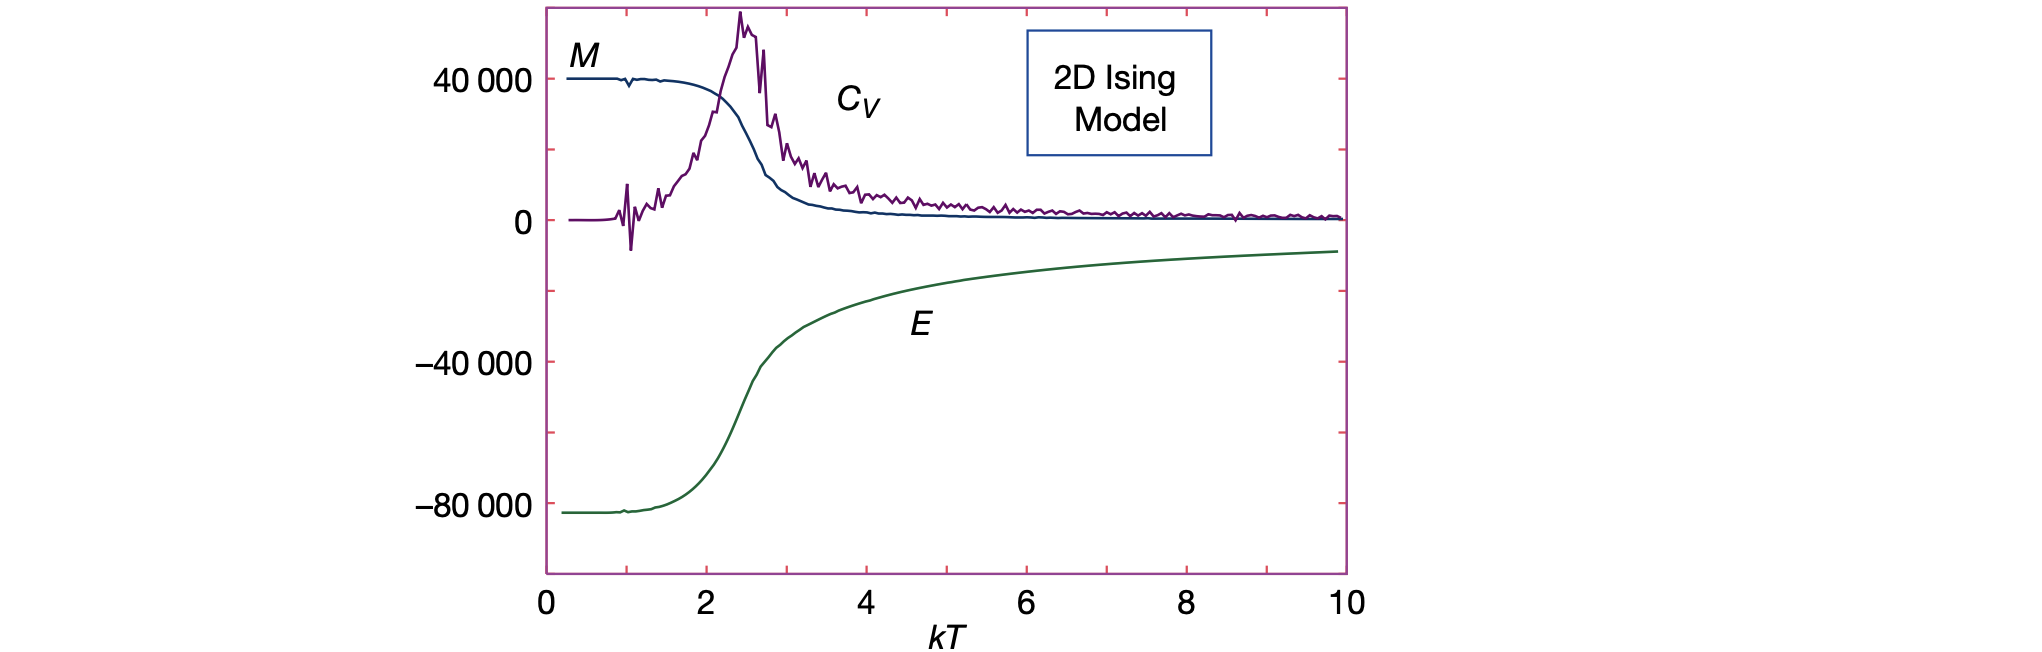


CPU times: user 275 ms, sys: 3.2 ms, total: 278 ms
Wall time: 279 ms


<IPython.core.display.Javascript object>


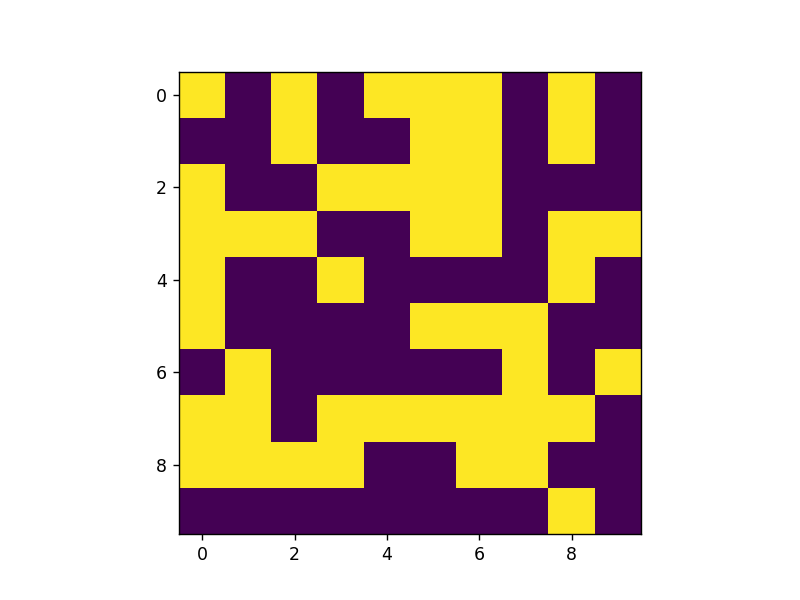

In [26]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

@jit
def initialize(X, Y):
    return np.random.randint(0,2,size=(X,Y))*2 - 1.0

@jit
def Etotal(lattice, J):
    # J = nearest neighbor coupling
    return 0.0

@jit
def Mtotal(lattice):
    return 0.0

@jit
def inner_step(lattice, J, T):
    X, Y = lattice.shape 
    E = Etotal(lattice, J) 
    M = Mtotal(lattice)

    for trials in range(X*Y):
        i = np.random.randint(0,X)
        j = np.random.randint(0,Y)
        #flips one spin. 
        lattice[i, j] = -lattice[i, j]
    return lattice, E, M

@jit
def run(lattice, noutersteps, J=1, T=1.0):
    X, Y = lattice.shape
    
    lattice_frames = [np.zeros((X, Y)) for i in range(noutersteps)]
    E_list = []
    M_list = []

    for outerstep in range(noutersteps):
        lattice, E, M  = inner_step(lattice, J, T)
        lattice_frames[outerstep] += lattice
        E_list.append(E)
        M_list.append(M)
    return lattice, E_list, M_list, lattice_frames

sizelatt=10
lattice = initialize(sizelatt, sizelatt)
J=1.0
T=1.0

%time final_lattice, E_T, M_T, lattice_T = run(lattice, 100, J=J, T=T)


fig = plt.figure()
im = plt.imshow(lattice_T[0], animated=True)


def animate(i):
    im.set_array(lattice_T[i])
    return im,

ani = animation.FuncAnimation(fig, animate, interval=50, blit=True)
plt.show()
